# Artificial Intelligence
# 464/664
# Assignment #5

## General Directions for this Assignment

00. We're using a Jupyter Notebook environment (tutorial available here: https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/what_is_jupyter.html),
01. Read the entire notebook before beginning your work,
02. Output format should be exactly as requested (it is your responsibility to make sure notebook looks as expected on Gradescope),
03. Each helper function should be preceeded by documentation (Markdown cell),
04. Each helper function should be followed by three assert-style unit tests,
05. Functions should do only one thing,
06. Check submission deadline on Gradescope,
07. Rename the file to Last_First_assignment_5,
08. Submit your notebook (as .ipynb, not PDF) using Gradescope, and
09. Do not submit any other files.

## Before You Submit...

1. Re-read the general instructions provided above, and
2. Hit "Kernel"->"Restart & Run All".

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
from copy import deepcopy
import numpy as np
from collections import deque

You might need to do a install to work with networkx

```
pip install networkx
```

## Map Coloring

It turns out that any division of a plane into contiguous regions can be colored such that no two adjacent regions are the same color by using only four colors (see [Four Color Theorem](http://en.wikipedia.org/wiki/Four_color_theorem), for more details) This **Constraint Satisfaction Problem** can be viewed as a constraint graph, where variables are nodes and no adjacent nodes can be of the same color.


Our first constraint graph is the dictionary `connecticut_graph` with three keys: 1) "nodes," which is a ordered list of strings that represent the nodes; 2) "edges," which indicates with tuples which nodes are adjacent; and 3) the "coordinates" key helps NetworkX make cartoons.

In [2]:
connecticut_graph = { "nodes": ["Fairfield", "Litchfield", "New Haven", "Hartford", "Middlesex", "Tolland", "New London", "Windham"],
                "edges": [(0,1), (0,2), (1,2), (1,3), (2,3), (2,4), (3,4), (3,5), (3,6), (4,6), (5,6), (5,7), (6,7)],
                "coordinates": [(46, 52), (65,142), (104, 77), (123,142), (147, 85), (162,140), (197, 94), (217,146)]}
print(connecticut_graph)

{'nodes': ['Fairfield', 'Litchfield', 'New Haven', 'Hartford', 'Middlesex', 'Tolland', 'New London', 'Windham'], 'edges': [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (2, 4), (3, 4), (3, 5), (3, 6), (4, 6), (5, 6), (5, 7), (6, 7)], 'coordinates': [(46, 52), (65, 142), (104, 77), (123, 142), (147, 85), (162, 140), (197, 94), (217, 146)]}


<a id="all_degrees"></a>
## all_degrees

This function calculates the degrees (number of neighbors) of each node in a given graph.  

* **constraint_graph** Dict: the dictionary with keys: nodes, edges, and coordinates.

**returns**


* **degrees** Dict: the dictionary with nodes as keys and their degrees as values

In [3]:
# returns in-degree dictionary
def all_degrees(constraint_graph):
  nodes = constraint_graph["nodes"]
  edges = constraint_graph["edges"]
  in_deg = [0] * len(nodes)
  for pair in edges:
    in_deg[pair[0]] += 1
    in_deg[pair[1]] += 1
  in_deg_dict = {}
  for i, deg in enumerate(in_deg):
    in_deg_dict[i] = deg
  return in_deg_dict

In [4]:
assert all_degrees(connecticut_graph).get(0) == 2
assert all_degrees(connecticut_graph).get(1) == 3
assert all_degrees(connecticut_graph) == {0:2, 1:3, 2:4, 3:5, 4:3, 5:3, 6:4, 7:2}

<a id="find_neighbors"></a>
## find_neighbors

This function finds the neighbors of the given node according to its edges in the constraint graph.

* **constraint_graph** Dict: the dictionary with keys: nodes, edges, and coordinates.
* **node_idx** int: the index of the node to search for neighbors for

**returns**

* **neighbors** List: the indices of the nodes neighboring the given node

In [5]:
def find_neighbors(constraint_graph, node_idx):
  neighbors = []
  for edge in constraint_graph["edges"]:
    if edge[0] == node_idx:
      neighbors.append(edge[1])
    elif edge[1] == node_idx:
      neighbors.append(edge[0])
  return neighbors

In [6]:
assert find_neighbors(connecticut_graph, 0) == [1,2]
assert find_neighbors(connecticut_graph, 3) == [1,2,4,5,6]
assert find_neighbors(connecticut_graph, 6) == [3,4,5,7]

<a id="fc"></a>
## fc

This function performs a forward check of the graph given the current node's color option and its neighboring nodes' heuristics. Returns a non-empty **problem_node** if this labeling causes any neighbors to break the constraint problem.

**constraint_graph** Dict: the dictionary with keys: nodes, edges, and coordinates.
* **node_idx** int: the index of the current node being labeled.
* **node_label**: str: the color (label) for the current node.
* **heuristics** List[Dict]: list containing each node's heuristics, where the color is the key and the value is the number of neighbors belonging to that color.
* **problem_node** set: contains the indices of any nodes that create a constraint problem, empty otherwise. [ *default = set()* ]
* **trace** Bool: a flag that when set to True, prints out a statement of current activites ('Forward Checking...'). [ *default = False* ]


**returns**


* **heuristics** List[Dict]: updated list containing each node's heuristics after labeling the current node. The color (label) is the key and number of neighbors belonging to that color is the value.
* **problem_node** set: updated to contain the index of the current node if a constraint problem is created, empty otherwise.

In [7]:
# gpt: returns updated heuristics and problem_node
def fc(constraint_graph, node_idx, node_label, heuristics, problem_node=set(), trace=False):
  if trace:
    print('Forward Checking...')

  for neighbor in find_neighbors(constraint_graph, node_idx):
    tracker = 0
    heuristics[neighbor][node_label] += 1 # given neighbor has us as a neighbor w/ color node_label
    for color in heuristics[neighbor]:
      if heuristics[neighbor][color] >= 1:
        tracker += 1
    if tracker == len(heuristics[neighbor]): # no colors available to this neighbor
      problem_node.add(node_idx)

  return heuristics, problem_node

In [8]:
labels = [(n, None) for n in connecticut_graph["nodes"]] # initialize as None
color_list = ["red", "blue", "green", "yellow"]
heuristic = []
for node_idx in range(len(labels)):
  heuristic.append({color: 0 for color in color_list})
assert(fc(connecticut_graph, 0, "red", heuristic)[0][1]) == {'red': 1, 'blue': 0, 'green': 0, 'yellow': 0}
assert(fc(connecticut_graph, 1, "blue", heuristic)[1]) == set()
assert(fc(connecticut_graph, 2, "blue", heuristic)) == ([{'red': 0, 'blue': 2, 'green': 0, 'yellow': 0}, {'red': 1, 'blue': 1, 'green': 0, 'yellow': 0}, {'red': 1, 'blue': 1, 'green': 0, 'yellow': 0}, {'red': 0, 'blue': 2, 'green': 0, 'yellow': 0}, {'red': 0, 'blue': 1, 'green': 0, 'yellow': 0}, {'red': 0, 'blue': 0, 'green': 0, 'yellow': 0}, {'red': 0, 'blue': 0, 'green': 0, 'yellow': 0}, {'red': 0, 'blue': 0, 'green': 0, 'yellow': 0}], set())

<a id="LCV"></a>
## LCV

This function determines the Least Constrained Value of all hodes in the graph.

* **constraint_graph** Dict: the dictionary with keys: nodes, edges, and coordinates.
* **color_list** List: the domain available to variables at the start of the CSP.
* **labels**: List[tuple(int, str)]: list containing tuples of each node's index in the graph and its corresponding label (string if colored, None otherwise).

**returns**

* **heuristics** List[Dict]: list containing each node's heuristics after labeling the current node. The color (label) is the key and number of neighbors belonging to that color is the value.

In [9]:
def LCV(constraint_graph, color_list, labels):
  heuristics = []
  for node_idx in range(len(labels)):
    heuristics.append({color: 0 for color in color_list})

    for neighbor in find_neighbors(constraint_graph, node_idx):
      if labels[neighbor][1] is not None:
        color = labels[neighbor][1]
        heuristics[node_idx][color] += 1
    sorted_heur = sorted(heuristics[node_idx].items(), key=lambda x: x[1])
    heuristics[node_idx] = {key: value for key, value in sorted_heur}

  return heuristics

In [10]:
assert (LCV(connecticut_graph, color_list, labels)[0]) == {"red":0, "blue":0, "green":0, "yellow":0}
labels[1] = (connecticut_graph["nodes"][1], "red")
assert (LCV(connecticut_graph, color_list, labels)[0]) == {"red":1, "blue":0, "green":0, "yellow":0}
labels[2] = (connecticut_graph["nodes"][2], "blue")
assert (LCV(connecticut_graph, color_list, labels)[0]) == {"red":1, "blue":1, "green":0, "yellow":0}

<a id="color_solution"></a>
## color_solution

This is a recursive helper function to find the solution for color_map with backtracking.

* **constraint_graph** Dict: the dictionary with keys: nodes, edges, and coordinates.
* **color_list** List: the domain available to variables at the start of the CSP.
* **curr_i** int: the current iteration number (index w.r.t. traversal through the Degree Heuristic list)
* **node_idx** int: the current node's index in the graph
* **degrees_list** List: the sorted list containing the node indices to be traversed according to the Degree Heuristic
* **labels** List[tuple(int, str)]: list containing tuples of each node's index in the graph and its corresponding label (string if colored, None otherwise).
* **heuristics** List[Dict]: list containing each node's heuristics. The color (label) is the key and number of neighbors belonging to that color is the value.
* **solution** Bool: True if solution to CSP is found, False otherwise. [ *default = False* ]
* **problem_node** set: contains the indices of any nodes that create a constraint problem, empty otherwise. [ *default = set()* ]
* **trace** Bool: a flag that when set to True, prints out statements that show what it is currently doing (in terms of the four features). [ *default = False* ]

**returns**

* **heuristics** List[Dict]: updated list containing each node's heuristics after labeling the current node. The color (label) is the key and number of neighbors belonging to that color is the value.
* **labels** List[tuple(int, str)]: updated list containing tuples of each node's index in the graph and its corresponding label (string if colored, None otherwise).
* **solution** Bool: True if solution to CSP is found, False otherwise. [ *default = False* ]

In [11]:
def color_solution(constraint_graph, color_list, curr_i, node_idx, degrees_list, labels, heuristics=None, solution=False, problem_node=None, trace=False):
    if trace:
        print('Picked node', node_idx, 'from Degree Heuristic')

    if problem_node is None:
        problem_node = set()  # initialize

    if labels[node_idx][1] is None:
        heuristics = LCV(constraint_graph, color_list, labels)
        if trace:
          print('Least Constrained Value:', list(heuristics[node_idx].keys())[0])
        for color in heuristics[node_idx]:
            labels[node_idx] = (constraint_graph["nodes"][node_idx], color)

            if curr_i != len(degrees_list) - 1:
                updated_heurs, problem_node = fc(constraint_graph, node_idx, color, heuristics.copy(), problem_node=problem_node, trace=trace)

                if len(problem_node) > 0:
                    problem_node.add(node_idx)
                    labels[node_idx] = (constraint_graph["nodes"][node_idx], None)
                    continue

                updated_heurs, updated_labels, solution = color_solution(constraint_graph, color_list, curr_i+1, degrees_list[curr_i+1], degrees_list, labels, heuristics=heuristics, problem_node=problem_node, trace=trace)
                if solution:
                    return updated_heurs, updated_labels, True
            else:
                if len(problem_node) == 0:
                    solution = True
                return heuristics, labels, solution

        if len(problem_node) > 0:
            problem_node.remove(node_idx)
            labels[node_idx] = (constraint_graph["nodes"][node_idx], None)
        if trace:
            print('Backtracking...')
        return heuristics, labels, False

    return heuristics, labels, solution

In [12]:
small_graph = { "nodes": ["A", "B", "C"],
                "edges": [(0,1), (1,2)],
                "coordinates": [(0, 0), (0,10), (10,0)] }
degrees_dict = all_degrees(small_graph)
degrees_list = list(dict(sorted(degrees_dict.items(), key=lambda item: item[1])).keys())
degrees_list.reverse()
labels = [(n, None) for n in small_graph["nodes"]]
small_solution = color_solution(small_graph, ["red", "blue"], 0, 1, degrees_list, labels.copy())
assert small_solution[2] == True
assert small_solution[0] == [{'blue': 0, 'red': 1}, {'red': 0, 'blue': 1}, {'blue': 0, 'red': 1}]
assert small_solution[1] == [('A', 'blue'), ('B', 'red'), ('C', 'blue')]
small_solution = color_solution(small_graph, ["red"], 0, 1, degrees_list, labels)
assert small_solution[2] == False

<a id="color_map"></a>
## color_map

This function colors a map provided as a constraint graph. The inputs are the constraint graph and a list of colors. Implementation should feature: 1) Backtracking, 2) Forward Checking, 3) variables picked using the Degreee Heuristic, and 4) Values picked using the Least Constrained Values heuristic. Each feature should be its own helper function, documented and tested.  

* **constraint_graph** Dict: the dictionary with keys: nodes, edges, and coordinates.
* **color_list** List: the domain available to variables at the start of the CSP.
* **trace** Bool: a flag that when set to True, prints out statements that show what it is currently doing (in terms of the four features)


**returns**


* **solution** List[Tuple[Str][Str]]: a list of (node name, assigned color) tuples, where the ordering matches the original ordering of nodes in the constraint_graph. For example, if we had `["A", "B"]` as nodes and `["Yellow", "Green"]` as colors, your function might return `[("A", "Yellow"), ("B", "Green")]`If the CSP cannot find a solution, `None` is returned.

In [13]:
def color_map(constraint_graph, color_list, trace=False):
    # Fix. Everything is colored red right now.
    # With your implementation, if a solution can't be found, it should return `None`.
    # Add features:
    # 1) Backtracking,
    # 2) Forward Checking,
    # 3) Variables picked using the Degreee Heuristic, and
    # 4) Values picked using the Least Constrained Values heuristic.
    # Features should be helper functions, documented and tested.
    degrees_dict = all_degrees(constraint_graph)
    degrees_list = list(dict(sorted(degrees_dict.items(), key=lambda item: item[1])).keys()) # ascending
    degrees_list.reverse() # descending
    labels = [(n, None) for n in constraint_graph["nodes"]] # initialize as None
    curr_deg_idx = 0
    solution = False

    node_idx = degrees_list[curr_deg_idx]
    heuristics, labels, solution = color_solution(constraint_graph, color_list, 0, node_idx, degrees_list, labels, trace=trace)

    if solution:
        return [(n, labels[i][1]) for i, n in enumerate(constraint_graph["nodes"])]
    else:
        return None

<a id="color_map"></a>
## test_coloring

This function tests the solution resulting from `color_map`. Adjacent nodes in the solution cannot be of the same color.

* **constraint_graph** Dict: the dictionary with keys: nodes, edges, and coordinates.
* **solution** List[Tuple[Str][Str]]: a list of (node name, assigned color) tuples


**returns**


Warning statement if there's a violation.

In [14]:
def test_coloring(constraint_graph, solution):
    nodes = constraint_graph[ "nodes"]
    edges = constraint_graph["edges"]
    for start, end in edges:
        try:
            assert solution[start][1] != solution[end][1]
        except AssertionError:
            print(f"{nodes[start]} and {nodes[end]} are adjacent but have the same color.")

<a id="draw_map"></a>
## draw_map

This function uses Networkx to draw the `constraint_graph`. Nodes are colored using `solution`.

* **title** Str: Title for the cartoon
* **constraint_graph** Dict with three keys: 1) "nodes," which is a ordered list of strings that represent the nodes; 2) "edges," which indicates with tuples which nodes are adjacent; and 3) the "coordinates" key helps NetworkX make cartoons.
* **size** Tuple[Int, Int]: inches wide x inches tall, so (8,10) results in 8"x10" rendering (depends on monitor)
* **solution** List[Tuple[Str][Str]]]: list of color assignments. Each item in the list is a (node name, assigned color) tuple. If set to None, all nodes are colored red.


**returns**

None. Draws constraint graph with specified color assignments for nodes.

In [15]:
def draw_map(title, constraint_graph, size, solution=None):
    def as_dictionary(a_list):
        dct = {}
        for i, e in enumerate(a_list):
            dct[i] = e
        return dct

    G = nx.Graph()

    labels = as_dictionary(constraint_graph["nodes"])
    pos = as_dictionary(constraint_graph["coordinates"])

    # create a List of Nodes as indices to match the "edges" entry.
    nodes = [n for n in range(0, len(constraint_graph["nodes"]))]

    if solution:
        colors = [c for n, c in solution]
    else:
        colors = ['red' for c in range(0,len(constraint_graph["nodes"]))]

    G.add_nodes_from(nodes)
    G.add_edges_from(constraint_graph["edges"])

    plt.figure(figsize=size, dpi=100)
    plt.title(title)
    nx.draw(G, node_color = colors, with_labels = True, labels = labels, pos = pos)

#    plt.savefig(name + ".png")

## Problem 1. Color Connecticut with Four Colors

In [16]:
connecticut_solution = color_map(connecticut_graph, ["red", "blue", "green", "yellow"], trace=True)

Picked node 3 from Degree Heuristic
Least Constrained Value: red
Forward Checking...
Picked node 6 from Degree Heuristic
Least Constrained Value: blue
Forward Checking...
Picked node 2 from Degree Heuristic
Least Constrained Value: blue
Forward Checking...
Picked node 5 from Degree Heuristic
Least Constrained Value: green
Forward Checking...
Picked node 4 from Degree Heuristic
Least Constrained Value: green
Forward Checking...
Picked node 1 from Degree Heuristic
Least Constrained Value: green
Forward Checking...
Picked node 7 from Degree Heuristic
Least Constrained Value: red
Forward Checking...
Picked node 0 from Degree Heuristic
Least Constrained Value: red


## Test Connecticut Solution

In [17]:
if connecticut_solution:
    test_coloring(connecticut_graph, connecticut_solution)

## Draw Connecticut Cartoon

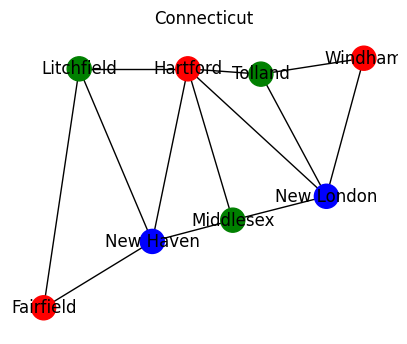

In [18]:
if connecticut_solution:
    draw_map("Connecticut", connecticut_graph, (5,4), connecticut_solution)

## Problem 2. Color Connecticut with Three Colors

In [19]:
connecticut_solution = color_map(connecticut_graph, ["red", "blue", "green"], trace=True)

Picked node 3 from Degree Heuristic
Least Constrained Value: red
Forward Checking...
Picked node 6 from Degree Heuristic
Least Constrained Value: blue
Forward Checking...
Picked node 2 from Degree Heuristic
Least Constrained Value: blue
Forward Checking...
Picked node 5 from Degree Heuristic
Least Constrained Value: green
Forward Checking...
Picked node 4 from Degree Heuristic
Least Constrained Value: green
Forward Checking...
Picked node 1 from Degree Heuristic
Least Constrained Value: green
Forward Checking...
Picked node 7 from Degree Heuristic
Least Constrained Value: red
Forward Checking...
Picked node 0 from Degree Heuristic
Least Constrained Value: red


## Test Connecticut Solution

In [20]:
if connecticut_solution:
    test_coloring(connecticut_graph, connecticut_solution)

## Draw Connecticut Cartoon

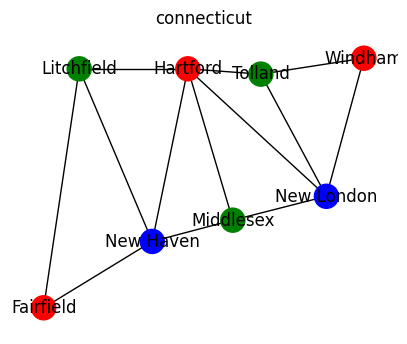

In [21]:
if connecticut_solution:
    draw_map("connecticut", connecticut_graph, (5,4), connecticut_solution)

## Problem 3. Color Europe with Four Colors

In [22]:
europe_graph = {
    "nodes":  ["Iceland", "Ireland", "United Kingdom", "Portugal", "Spain",
                 "France", "Belgium", "Netherlands", "Luxembourg", "Germany",
                 "Denmark", "Norway", "Sweden", "Finland", "Estonia",
                 "Latvia", "Lithuania", "Poland", "Czech Republic", "Austria",
                 "Liechtenstein", "Switzerland", "Italy", "Malta", "Greece",
                 "Albania", "Macedonia", "Kosovo", "Montenegro", "Bosnia Herzegovina",
                 "Serbia", "Croatia", "Slovenia", "Hungary", "Slovakia",
                 "Belarus", "Ukraine", "Moldova", "Romania", "Bulgaria",
                 "Cyprus", "Turkey", "Georgia", "Armenia", "Azerbaijan",
                 "Russia" ],
    "edges": [(0,1), (0,2), (1,2), (2,5), (2,6), (2,7), (2,11), (3,4),
                 (4,5), (4,22), (5,6), (5,8), (5,9), (5,21), (5,22),(6,7),
                 (6,8), (6,9), (7,9), (8,9), (9,10), (9,12), (9,17), (9,18),
                 (9,19), (9,21), (10,11), (10,12), (10,17), (11,12), (11,13), (11,45),
                 (12,13), (12,14), (12,15), (12,17), (13,14), (13,45), (14,15),
                 (14,45), (15,16), (15,35), (15,45), (16,17), (16,35), (17,18),
                 (17,34), (17,35), (17,36), (18,19), (18,34), (19,20), (19,21),
                 (19,22), (19,32), (19,33), (19,34), (20,21), (21,22), (22,23),
                 (22,24), (22,25), (22,28), (22,29), (22,31), (22,32), (24,25),
                 (24,26), (24,39), (24,40), (24,41), (25,26), (25,27), (25,28),
                 (26,27), (26,30), (26,39), (27,28), (27,30), (28,29), (28,30),
                 (29,30), (29,31), (30,31), (30,33), (30,38), (30,39), (31,32),
                 (31,33), (32,33), (33,34), (33,36), (33,38), (34,36), (35,36),
                 (35,45), (36,37), (36,38), (36,45), (37,38), (38,39), (39,41),
                 (40,41), (41,42), (41,43), (41,44), (42,43), (42,44), (42,45),
                 (43,44), (44,45)],
    "coordinates": [( 18,147), ( 48, 83), ( 64, 90), ( 47, 28), ( 63, 34),
                   ( 78, 55), ( 82, 74), ( 84, 80), ( 82, 69), (100, 78),
                   ( 94, 97), (110,162), (116,144), (143,149), (140,111),
                   (137,102), (136, 95), (122, 78), (110, 67), (112, 60),
                   ( 98, 59), ( 93, 55), (102, 35), (108, 14), (130, 22),
                   (125, 32), (128, 37), (127, 40), (122, 42), (118, 47),
                   (127, 48), (116, 53), (111, 54), (122, 57), (124, 65),
                   (146, 87), (158, 65), (148, 57), (138, 54), (137, 41),
                   (160, 13), (168, 29), (189, 39), (194, 32), (202, 33),
                   (191,118)]}
print(europe_graph)

{'nodes': ['Iceland', 'Ireland', 'United Kingdom', 'Portugal', 'Spain', 'France', 'Belgium', 'Netherlands', 'Luxembourg', 'Germany', 'Denmark', 'Norway', 'Sweden', 'Finland', 'Estonia', 'Latvia', 'Lithuania', 'Poland', 'Czech Republic', 'Austria', 'Liechtenstein', 'Switzerland', 'Italy', 'Malta', 'Greece', 'Albania', 'Macedonia', 'Kosovo', 'Montenegro', 'Bosnia Herzegovina', 'Serbia', 'Croatia', 'Slovenia', 'Hungary', 'Slovakia', 'Belarus', 'Ukraine', 'Moldova', 'Romania', 'Bulgaria', 'Cyprus', 'Turkey', 'Georgia', 'Armenia', 'Azerbaijan', 'Russia'], 'edges': [(0, 1), (0, 2), (1, 2), (2, 5), (2, 6), (2, 7), (2, 11), (3, 4), (4, 5), (4, 22), (5, 6), (5, 8), (5, 9), (5, 21), (5, 22), (6, 7), (6, 8), (6, 9), (7, 9), (8, 9), (9, 10), (9, 12), (9, 17), (9, 18), (9, 19), (9, 21), (10, 11), (10, 12), (10, 17), (11, 12), (11, 13), (11, 45), (12, 13), (12, 14), (12, 15), (12, 17), (13, 14), (13, 45), (14, 15), (14, 45), (15, 16), (15, 35), (15, 45), (16, 17), (16, 35), (17, 18), (17, 34), (17, 

In [23]:
europe_solution = color_map(europe_graph, ["red", "blue", "green", "yellow"], trace=False)

## Test Europe Solution

In [24]:
if europe_solution:
    test_coloring(europe_graph, europe_solution)

## Draw Europe Cartoon

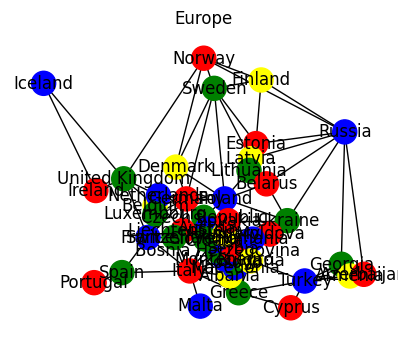

In [25]:
if europe_solution:
    draw_map("Europe", europe_graph, (5,4), europe_solution)

## Problem 4. Color Europe with Three Colors

In [26]:
europe_solution = color_map(europe_graph, ["red", "blue", "green"], trace=False)

## Test Europe Solution

In [27]:
if europe_solution:
    test_coloring(europe_graph, europe_solution)

## Draw Europe Cartoon

In [28]:
if europe_solution:
    draw_map("Europe", europe_graph, (5,4), europe_solution)

## Before You Submit...

1. Re-read the general instructions provided above, and
2. Hit "Kernel"->"Restart & Run All".